In [1]:
import numpy as np
from cdo import *
cdo = Cdo()        

bbox = '-80,22.5,50,70'
# global dataset CMIP5
resources = '/home/nils/.conda/envs/birdhouse/var/lib/cache/pywps/esgf1.dkrz.de/thredds/fileServer/cmip5/cmip5/output1/MPI-M/MPI-ESM-P/historical/day/atmos/day/r1i1p1/v20120315/psl/psl_day_MPI-ESM-P_historical_r1i1p1_20000101-20051231.nc'

In [2]:
# get the North Atlanic region form global dataset with cdo
nc  = cdo.sellonlatbox( bbox, input=resources, output='subset.nc' )

In [ ]:
# read in the file
from netCDF4 import Dataset, num2date
from flyingpigeon.utils import get_variable

var = get_variable(nc)
#print 'variable name: %s' % var
ds = Dataset(nc)
psl = ds.variables[var]
lat = ds.variables['lat']
lon = ds.variables['lon']

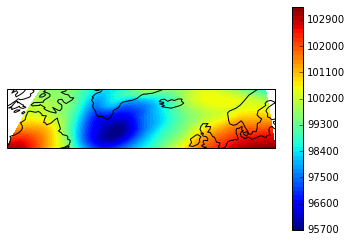

In [5]:
from matplotlib import pyplot as plt
from cartopy import config
from cartopy.util import add_cyclic_point
import cartopy.crs as ccrs
from numpy import meshgrid
# to show the plots inline
%matplotlib inline

lons, lats = meshgrid(lon, lat)

# plot first time stepp:
ax = plt.axes(projection=ccrs.Robinson(central_longitude=0))
ax.coastlines()
cs = plt.contourf(lons, lats, psl[0,:,:], 60, transform=ccrs.PlateCarree(), interpolation='nearest')
plt.colorbar()


In [17]:
# same stepps with ocgis

from flyingpigeon.ocgis_module import call 

#from ocgis import RequestDataset ,OcgOperations
bbox = [-80,22.5,50,70]
nc = call(resources, geom=bbox, dir_output='/home/nils/data/tests')
print nc

start ocgis module
/home/nils/data/tests/ocgis_output.nc


In [18]:
#read in the data 
var = get_variable(nc)
#print 'variable name: %s' % var
ds = Dataset(nc)
psl = ds.variables[var]
lat = ds.variables['lat']
lon = ds.variables['lon']

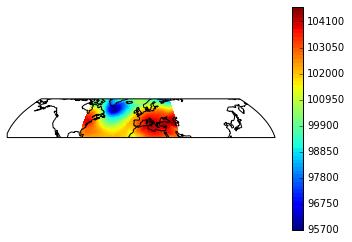

In [19]:
lons, lats = meshgrid(lon, lat)

# plot first time stepp:
ax = plt.axes(projection=ccrs.Robinson(central_longitude=0))
ax.coastlines()
cs = plt.contourf(lons, lats, psl[0,:,:], 60, transform=ccrs.PlateCarree(), interpolation='nearest')
plt.colorbar()

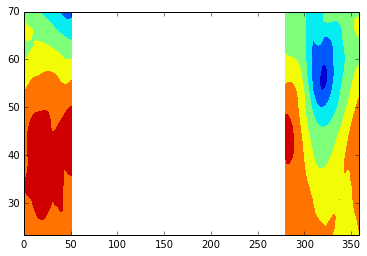

In [20]:
# cartopy puts it together how I would like to have it ;-) 
# simple plot shows the 'problem'
cs = plt.contourf(lons, lats, psl[0,:,:])

In [ ]:
# can we get rid of the white space in between? 